# Model regresji liniowej w scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# Zadanie 1
Wczytaj zbiór `Carseats`, który zawierają dane o sprzedaży fotelików samochodowych pewnej firmy w 400 różnych lokalizacjach:

a) dopasuj model regresji liniowej `Sales~Price`;

b) dopasuj model regresji liniowej `Sales~Price + Advertising`;

c) dopasuj model regresji liniowej `Sales~.`;

d) dopasuj model regresji wielomianowej stopnia 2 dla zmiennej `Price`;

e) dopasuj model regresji wielomianowej stopnia 3 dla zmiennej `Price`;

In [2]:
carseats = sm.datasets.get_rdataset(dataname="Carseats", package="ISLR", cache=True)
print(carseats.data)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0          

In [3]:
#model Sales~Price
#najpierw definiujemy obiekt LinearRegression z parametrami go charakteryzującymi
lm1 = LinearRegression(fit_intercept=True)
X = np.array(carseats.data.Price).reshape(-1, 1)
print(X[0,0])
#teraz dopasowujemy wcześniej zdefiniowany obiekt LinearRegression do naszych danych
lm1.fit(X = X,y = carseats.data.Sales)
#współczynniki bez wyrazu wolnego
print(lm1.coef_)
#wyraz wolny
lm1.intercept_

120
[-0.05307302]


13.641915176780913

In [4]:
#score oznacza różne miary dla różnych obiektów. Dla regresji liniowej jest to R^2
lm1.score(X,carseats.data.Sales)

0.19798115021119478

In [5]:
#wartości dopasowane (ale za X można włożyć zbiór testowy i wówczas mamy predykcje)
lm1.predict(X)

array([ 7.27315296,  9.23685464,  9.3960737 ,  8.49383238,  6.84856881,
        9.82065785,  7.91002918,  7.27315296,  7.06086088,  7.06086088,
        8.33461333,  8.65305144,  6.42398466,  9.07763559,  7.37929899,
        5.99940051,  7.80388314,  6.68934975, 10.03294992,  7.22007994,
        6.68934975,  7.85695616,  6.31783862,  7.85695616,  7.64466409,
        9.28992766,  6.68934975,  7.9631022 ,  8.49383238,  8.22846729,
        8.91841653,  6.68934975,  6.37091164,  6.84856881,  6.84856881,
        8.5469054 ,  8.33461333,  7.80388314,  8.22846729,  6.31783862,
        6.95471485,  7.06086088, 12.36816273,  6.5301307 ,  8.59997842,
        6.47705768,  9.92680388,  7.91002918,  8.44075936,  5.73403542,
        7.91002918,  7.91002918,  6.79549579,  7.32622598,  5.99940051,
        5.46867033,  9.18378162,  7.43237201,  8.17539427,  7.59159107,
        7.1139339 ,  7.9631022 ,  6.58320372,  8.28154031,  8.12232125,
        6.84856881,  8.81227049,  7.53851805,  6.5301307 ,  8.38

In [6]:
#model Sales~Price + Advertising
X2 = np.array(carseats.data)[:,np.array([3,5])]
lm2 = LinearRegression(fit_intercept=True)
lm2.fit(X2,y = carseats.data.Sales)
lm2.coef_
lm2.intercept_
#R^2
lm2.score(X2,carseats.data.Sales)

0.28185560334302273

In [7]:
#model Sales~.
X3 = carseats.data
#na początku dla zmiennych kategorycznych robimy one hot encoding 
#(dyskusja przy zadaniu 3 i 3.1 w zestawie dotyczącym regresji jednokrotnej)
X3 = pd.get_dummies(X3,drop_first =True)
#drop_first pozwala na usunięcie z rozważań jednej kolumny, np. dla 3 czynników Bad, Medium i Good,
#usuwamy kolumnę 0-1 kową Bad i zostaje tylko Medium i Good, ale one w rzeczywistości wystarczą
print(X3)
lm3 = LinearRegression(fit_intercept=True)
X3 = np.array(X3)[:,1:]
lm3.fit(X3,y = carseats.data.Sales)
lm3.coef_
lm3.intercept_
#R^2
lm3.score(X3,carseats.data.Sales)

     Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0     9.50        138      73           11         276    120   42         17   
1    11.22        111      48           16         260     83   65         10   
2    10.06        113      35           10         269     80   59         12   
3     7.40        117     100            4         466     97   55         14   
4     4.15        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395  12.57        138     108           17         203    128   33         14   
396   6.14        139      23            3          37    120   55         11   
397   7.41        162      26           12         368    159   40         18   
398   5.94        100      79            7         284     95   50         12   
399   9.71        134      37            0          27    120   49         16   

     ShelveLoc_Good  Shelve

0.8734133434127013

In [8]:
#teraz wielomian stopnia 2
price = np.array(carseats.data.Price).reshape(-1,1)
#chcemy mieć tylko x i x^2, bo wyraz wolny sam obiekt LinearRegression sobie doliczy,
#stąd include_bias = False
poly2 = PolynomialFeatures(degree = 2,include_bias = False)
price2 = poly2.fit_transform(price)
lm4 = LinearRegression(fit_intercept=True)
lm4.fit(X=price2,y = carseats.data.Sales)
print(lm4.coef_)
print(lm4.intercept_)
lm4.score(price2,carseats.data.Sales)

[-6.4591343e-02  5.0377893e-05]
14.272018030033502


0.1982221162426384

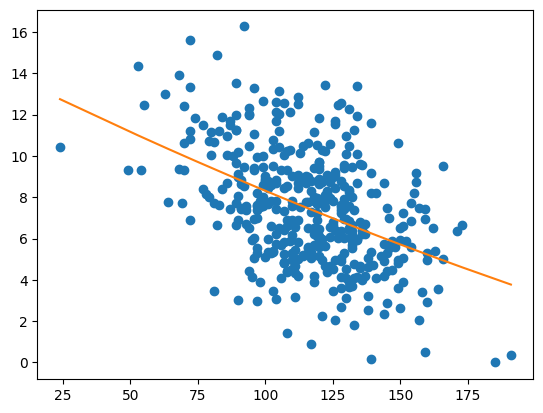

In [9]:
sort = np.argsort(price.T)[0]
plt.plot(carseats.data.Price, carseats.data.Sales,'o')
plt.plot(price[sort], lm4.predict(price2)[sort])

In [10]:
#teraz wielomian stopnia 3
price = np.array(carseats.data.Price).reshape(-1,1)
poly3 = PolynomialFeatures(degree = 3,include_bias = False)
price3 = poly3.fit_transform(price)
lm5 = LinearRegression(fit_intercept=True)
lm5.fit(X=price3,y = carseats.data.Sales)
print(lm5.coef_)
print(lm5.intercept_)
lm5.score(price3,carseats.data.Sales)

[-1.27155678e-01  6.42436294e-04 -1.77055030e-06]
16.337010828654726


0.19891039596334037

### make_pipelines 

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html?highlight=make_pipeline#sklearn.pipeline.make_pipeline

In [11]:
#preprocessing danych i dopasowanie modelu w jednej funkcji
#tu wielomian stopnia 2
pipeline1 = make_pipeline(PolynomialFeatures(degree = 2,include_bias=False),LinearRegression())
lm4  = pipeline1.fit(X = price,y = carseats.data.Sales)

lm4.score(price,carseats.data.Sales)
#Aby dojść do parametrów elementu pipelina najpierw bierzemy indeks elementu, 
#wywołujemy pipeline z numerem indeksu i po kropce parametr. 
lm4[1].coef_
lm4[1].intercept_

14.272018030033502

# Wybór i ocena najlepszego modelu regresji

Podczas budowy modelu, którego celem jest przewidywanie pewnych wartości na podstawie zbioru danych uczących poważnym problemem jest ocena jakości uczenia i zdolności poprawnego przewidywania.

**Częstym błędem osób początkujących w zakresie analizy danych jest przeprowadzanie testów na tym samym zbiorze na którym system był uczony**. Takie rozwiązanie nie jest poprawnym miernikiem jakości nauczonego modelu i prowadzi do wyników które są przeszacowane, czyli nadmiernie optymistyczne.

Zwykle głównym celem budowy modeli predykcyjnych jest późniejsze wykorzystanie przewidywań modelu na danych niedostępnych podczas procesu uczenia więc opracowano szereg metod pozwalających na znacznie bardziej uczciwy pomiar dokładności.

### Podział zbioru na część:
- treningową,
- testową.

Idea oceny modelu lub doboru odpowiednich parametrów modelu sprowadza się wówczas do nauczenia modelu na części uczącej oraz przetestowania go na części testowej, która nie była wykorzystywana w procesie uczenia modelu. Dzięki wydzieleniu dwóch niezależnych podzbiorów, wektory części testowej zawierają informację o faktycznym wyniku jaki powinien zostać osiągnięty, natomiast nauczony (na części uczącej zbioru) model dostarcza wyników przewidywań.

lub 

- treningową,
- walidacyjną,
- testową.

Nierzadko, z wydzielenia próby walidacyjnej oraz testowej trzeba zrezygnować i wszystkie dane uznać za elementy próby uczącej. Jak wówczas porównywać różne modele?

Trzeba się odwołać do wielokrotnego wykorzystania elementów próby uczącej, tak przy tym zorganizowanego, by wprowadzane tym sposobem obciążenie otrzymywanych oszacowań było możliwie małe.

## Kroswalidacja - sprawdzanie krzyżowe

1. Próba ucząca zostaje podzielona na $K$ możliwie równych części.

2. Z próby uczącej tworzy się $K$ różnych pseudoprób, powstających przez usuwanie z próby oryginalnej jednej z jej $K$ części. Każda pseudopróba składa się $K-1$ części próby uczącej.

3. Dany model jest budowany $K$-krotnie, za każdym razem na podstawie innej pseudopróby.

4. Otrzymujemy $K$ wersji tego samego modelu.

5. Każda $k$-ta wersja modelu jest oceniana na tej części oryginalnej próby uczącej, która nie weszła do $k$-tej pseudopróby. Tym sposobem, oceny danej wersji modelu dokonujemy na obserwacjach, które nie brały udziałuw jego konstrukcji.

6. Oszacowanie błędu kroswalidacji wyznaczamy jako średnią z błędów każdej wersji modelu.

## Pomiary błędów

### Błąd średniokwadratowy (ang. *Mean squared error*)
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2.
$$

### Mediana błędu bezwzględnego (ang. *Median absolute error*)
$$
\text{MAE}= \text{Med}(|y_i - \hat{y}_i|).
$$

## Zadanie 2
Wczytaj zbiór `Carseats`, a następnie

1. Podziel zbiór na część treningową i testową w stosunku 7:3.

2. Naucz dowolny model na części treningowej: 
    - wyznacz błąd dopasowania wykorzystującz MSE i MAE;
    - wyznacz te same błędy wykorzystując metodę kroswalidacji.

3. Sprawdź jakość predykcji. Na podstawie nauczonego modelu na części treningowej, dokonaj predykcji wartość `Sales` dla wartości ze zbioru testowego. Porównaj jakość dopasowania z jakością predykcji.

In [12]:
from sklearn.model_selection import cross_val_score, train_test_split

In [13]:
carseats = sm.datasets.get_rdataset(dataname="Carseats", package="ISLR", cache=True)

In [14]:
# Podział zbioru na część treningową i na część testową
y = carseats.data.Sales
X = carseats.data.iloc[:,1:]
X = pd.get_dummies(X,drop_first=True)
print(X.head())
#randomstate bo podział losowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

   CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes  
0               0                 0          1       1  
1               1                 0          1       1  
2               0                 1          1       1  
3               0                 1          1       1  
4               0                 0          1       0  


In [15]:
#sprawdzenie
print(X_train.shape[0] / X.shape[0], X_test.shape[0] / X.shape[0])

0.7 0.3


In [16]:
# Model 
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)

LinearRegression()

In [17]:
import sklearn.metrics as metrics

In [18]:
#jakośc dopasowania (czyli miary na zb. treningowym)
print("Train R2: {}".format(lm.score(X_train, y_train)))
print("Train MSE: {}".format(metrics.mean_squared_error(y_true=y_train, y_pred=lm.predict(X_train))))
print("Train MAE: {}".format(metrics.median_absolute_error(y_true=y_train, y_pred=lm.predict(X_train))))
print("Train MAR: {}".format(metrics.mean_absolute_error(y_true=y_train, y_pred=lm.predict(X_train))))

Train R2: 0.8877516608074592
Train MSE: 0.9085503897084769
Train MAE: 0.6619545609541619
Train MAR: 0.7652564384688191


In [19]:
# Za pomocą metody kroswalidacji
lm = LinearRegression()
cv = 10 #liczba podzbiorów biorących udzia w kroswalidacji
print("CV Train R2: {}".format(cross_val_score(lm, X, y, cv=cv).mean()))
print("CV Train MSE: {}".format(-cross_val_score(lm, X, y, 
                                           scoring = 'neg_mean_squared_error', cv=cv).mean()))
print("CV Train MAE: {}".format(-cross_val_score(lm, X, y, 
                                           scoring = 'neg_median_absolute_error', cv=cv).mean()))
#R^2 maleje, bo jednak jest liczony na części testowej w każdym obrocie pętli kroswalidacyjnej, a MSE i MAE rosną

CV Train R2: 0.8570046698819294
CV Train MSE: 1.0699336881636563
CV Train MAE: 0.7201591261436755


In [21]:
#jakośc predykcji (na zb. testowym)
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
print("Test MSE: {}".format(metrics.mean_squared_error(y_true=y_test, y_pred=lm.predict(X_test))))
print("Test MAR: {}".format(metrics.mean_absolute_error(y_true=y_test, y_pred=lm.predict(X_test))))
print("Test MAE: {}".format(metrics.median_absolute_error(y_true=y_test, y_pred=lm.predict(X_test))))
# MSE MAR i MAE rosną

Test MSE: 1.305247392983759
Test MAR: 0.9042605739350009
Test MAE: 0.7750702168988828


# *Zadanie 3
Napisz własną funkcję do kroswalidacji (użyj `from sklearn.model_selection import KFold`).

In [22]:
from sklearn.model_selection import KFold 
#KFold dokonuje podziału na n_splits części
#W każdym obrocie pętli pod test_index są indeksy innej części, a reszta części, 
#które pozostają, służy do uczenia

In [23]:
def cv_fun(model, X, y, cv, score_fun):
    kf = KFold(n_splits=cv)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X=X_train, y=y_train)
        y_pred = model.predict(X_test)
        scores.append(score_fun(y_test, y_pred))
    return np.array(scores)

In [24]:
cv_fun(lm, X, y, 10, metrics.mean_squared_error).mean()

1.0699336881636563

In [25]:
cv_fun(lm, X, y, 10, metrics.median_absolute_error).mean()

0.7201591261436755

# Zadanie 4
Dla zbióru `Carseats`,

1. Podziel zbiór na część treningową i testową;

2. Dopasuj model regresji:

a) liniowej `Sales~Price`;

b) liniowej `Sales~Price + Advertising`;

c) liniowej `Sales~.`;

d) wielomianowej stopnia 2 dla zmiennej `Price`;

e) wielomianowej stopnia 3 dla zmiennej `Price`;

3. Wybierz najlepszy model na podstawie miar jakości otrzymanych przy użyciu kroswalidacji 10-krotnej.

4. Dla najlepszego modelu dokonaj predykcji na zbiorze testowy. Wyznacz jakość predykcji.

In [26]:
#zmienne zależne i niezależne i one-hot-encoding
y = carseats.data['Sales']
X = carseats.data.drop('Sales', axis=1)
X = pd.get_dummies(X)

In [27]:
#1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [28]:
#2
#Funkcja do tworzenia regresji wielomianowej 
#(w szególności stopnia 1 - więczwykłej regresji liniowej) 
#a także do liczenia scoreów metodą kroswalidacji

def fit_model(X_train, y_train, degree=1):
    model = make_pipeline(
        PolynomialFeatures(degree=degree,include_bias=False),
        LinearRegression()
    )
    cv_r2 = cross_val_score(model, X_train, y_train, scoring='r2', cv=10).mean()
    cv_mse = -cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10).mean()
    cv_mae = -cross_val_score(model, X_train, y_train, scoring='neg_median_absolute_error', cv=10).mean()
    
    return {
        'cv_r2': cv_r2, 'cv_mse': cv_mse, 'cv_mae': cv_mae
    }


In [29]:
results = pd.DataFrame(index=['cv_r2', 'cv_mse', 'cv_mae'])
results['lm(Sales~Price)'] = fit_model(X_train=np.array(X_train['Price']).reshape(-1, 1), y_train=y_train).values()
results['lm(Sales~Price+Advertising)'] = fit_model(X_train=X_train[['Price', 'Advertising']], y_train=y_train).values()
results['lm(Sales~.)'] = fit_model(X_train=X_train, y_train=y_train).values()
results['poly2(Sales~Price)'] = fit_model(X_train=np.array(X_train['Price']).reshape(-1, 1), y_train=y_train, degree=2).values()
results['poly3(Sales~Price)'] = fit_model(X_train=np.array(X_train['Price']).reshape(-1, 1), y_train=y_train, degree=3).values()
results

,lm(Sales~Price),lm(Sales~Price+Advertising),lm(Sales~.),poly2(Sales~Price),poly3(Sales~Price)
cv_r2,0.134812,0.218384,0.856823,0.133412,0.131569
cv_mse,6.684562,6.060563,0.998997,6.727347,6.703862
cv_mae,1.721873,1.597759,0.719593,1.749296,1.753124


In [30]:
# 3. Wybierz najlepszy model na podstawie miar jakości otrzymanych przy użyciu kroswalidacji 10-krotnej.
# Najlepsze wyniki na zbiorze treningowym otrzymał model: lm(Sales~.)

In [31]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
#4
#na testowym jakość predykcji
print("Test MSE: {}".format(metrics.mean_squared_error(y_pred=y_pred, y_true=y_test)))
print("Test MAE: {}".format(metrics.mean_absolute_error(y_pred=y_pred, y_true=y_test)))

Test MSE: 1.305247392983756
Test MAE: 0.9042605739350001
